In [1]:
import tensorflow as tf
print ('Using Tensorflow version', tf.__version__)

2024-06-21 21:09:29.444609: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using Tensorflow version 2.16.1


In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

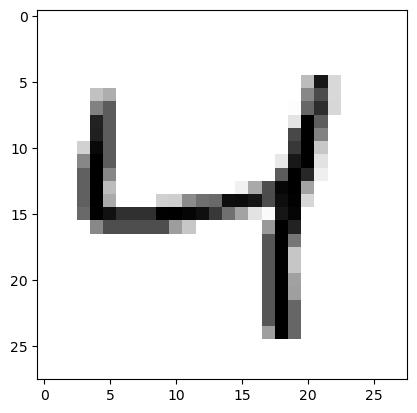

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[2], cmap='binary')
plt.show

In [11]:
y_train[1]

0

In [13]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [15]:
from tensorflow.keras.utils import to_categorical

y_train_encoded= to_categorical(y_train)
y_test_encoded= to_categorical(y_test)

print('y_train_encoded_shape', y_train_encoded.shape)
print('y_test_encoded_shape', y_test_encoded.shape)

y_train_encoded_shape (60000, 10)
y_test_encoded_shape (10000, 10)


In [19]:
y_train_encoded[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
import numpy as np

x_train_reshaped= np.reshape(x_train, (60000, 784))
x_test_reshaped= np.reshape(x_test, (10000, 784))

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [61]:
print(set(x_train_reshaped[1]))

{0, 6, 7, 10, 12, 19, 21, 25, 28, 29, 37, 38, 47, 48, 50, 51, 54, 56, 57, 60, 63, 71, 75, 76, 79, 84, 85, 86, 96, 112, 114, 121, 122, 128, 130, 131, 135, 141, 145, 146, 148, 159, 162, 163, 165, 167, 168, 173, 178, 179, 186, 189, 190, 195, 196, 198, 199, 202, 208, 215, 223, 224, 225, 227, 228, 229, 230, 233, 237, 238, 239, 240, 243, 246, 249, 252, 253, 255}


In [ ]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

epsilon = 1e-10

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)

x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)
print(x_test_norm)

In [92]:
print(set(x_train_norm[1]))

{0.2632332858605251, 1.5996639141274305, 2.7960875241949457, 2.6051688630139593, 2.7833596134495466, 2.5924409522685603, 2.465161844814569, 2.6178967737593584, 2.5415293092869637, 2.426978112578372, 1.7142151108360224, 2.668808416740955, 2.057868700961798, 1.421473163691843, 1.1287312165476637, 0.059586713934139515, 2.7451758812133495, 2.1087803439433945, 0.5432473222593053, 0.2250495536243278, -0.18224359022844336, 1.2305545025108566, 2.5033455770507667, 0.3014170180967224, 2.31242691586978, 1.676031378599825, -0.4240738943910262, 0.18686582138813052, -0.05496448277445237, -0.33497851917323257, -0.29679478693703526, 2.070596611707197, 2.706992148977152, 2.4142502018329726, 1.7778546645630178, 1.4342010744372422, 1.2432824132562557, 2.2233315406519862, 1.294194056237852, 0.6577985189678972, 1.9815012364894034, 1.0014521090936728, 1.6378476463636278, -0.27133896544623703, 0.7978055371672873, 0.4796077685323098, 0.5305194115139061, 0.6450706082224981, 2.477889755559968, 2.821543345685743

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784, )),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])


In [164]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'] 
)



In [166]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train_encoded, epochs=3, batch_size=60000)

In [172]:
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}/{len(history.history['loss'])}")
    print(f"60000/60000 [==============================] - loss: {history.history['loss'][epoch]:.4f} - accuracy: {history.history['accuracy'][epoch]:.4f}")

Epoch 1/3
60000/60000 [==============================] - loss: 0.0030 - accuracy: 0.9961
Epoch 2/3
60000/60000 [==============================] - loss: 0.0029 - accuracy: 0.9963
Epoch 3/3
60000/60000 [==============================] - loss: 0.0028 - accuracy: 0.9966


In [174]:
loss, accuracy= model.evaluate(x_test_norm,y_test_encoded)
print('test set accuracy', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9506 - loss: 0.1572
test set accuracy 95.89999914169312


In [180]:
preds = model.predict(x_test_norm)
print('shape of pred:', preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
shape of pred: (10000, 10)


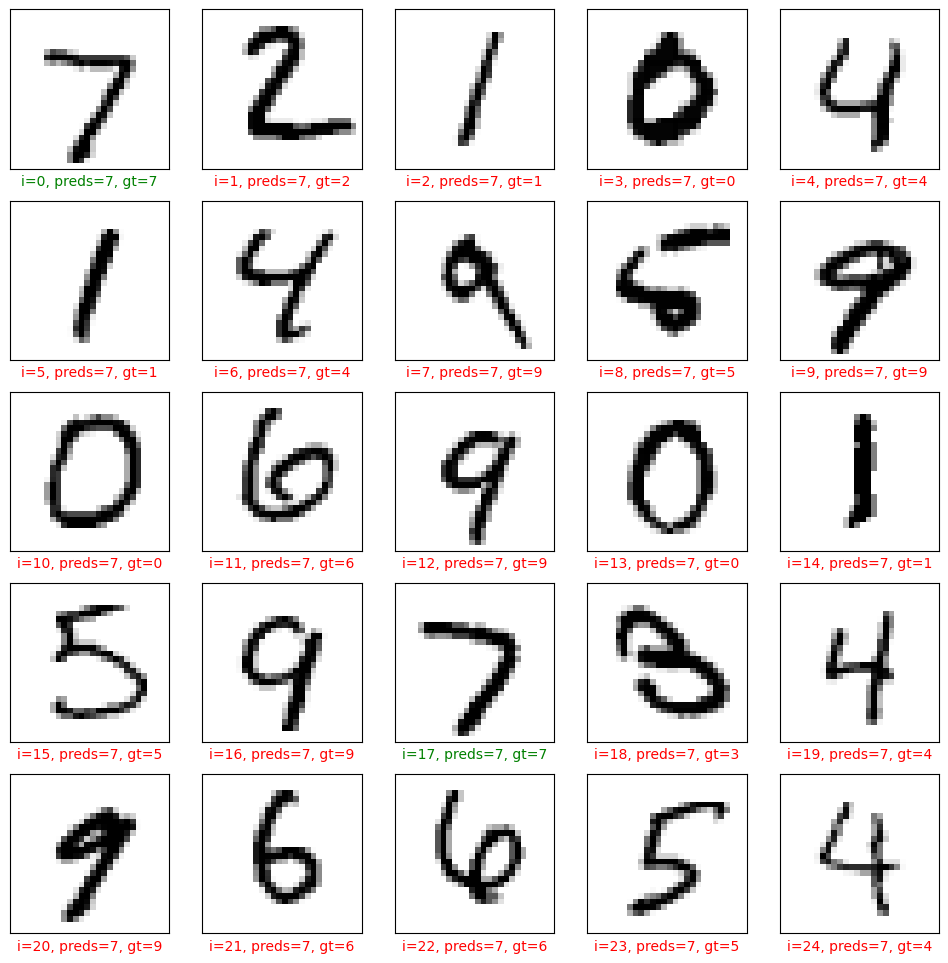

In [222]:
plt.figure(figsize=(12,12))

start_index = 0
for i in range(25):
    plt.subplot(5,5,i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred_index = np.argmax(preds)
    gt = y_test[start_index+i]

    col = 'g'
    if preds != gt:
        col='r'

    plt.xlabel('i={}, preds={}, gt={}'.format(start_index + i, preds, gt), color=col)
    plt.imshow(x_test[start_index + i], cmap= 'binary')

plt.show()